Codigo para implementar una cinemática inversa en un brazo robotico

Exportamos las librerías necesarias

In [1]:
### libreria ikpy (inverse kinematics) para hallar los angulos necesarios para que el efector final de brazo robotico
### se desplace hacia el objetivo solicitado
import ikpy.chain
import ikpy.utils.plot as plot_utils

### se importan las liberias numpy (matrices) , tiempo y matematica
import numpy as np
import time
import math

### se importa liberia ipywidgets para crear graficos y controles interactivos
import ipywidgets as widgets

### se importa la liberia servoKit para controlar los servomotores

##from adafruit_servokit import ServoKit
##from time import sleep

Se importa la simulación del brazo robotico de formato URDF. El primer link es el link entre la superficie y la base del brazo robotico, estará desactivado

In [2]:
my_chain = ikpy.chain.Chain.from_urdf_file("arm_urdf.urdf",active_links_mask=[False, True, True, True, True, True, True])

Definimos la posición y la orientación para el objetivo solicitado

In [3]:
target_position = [ 0.1, 0.2,0.3]

target_orientation = [-1, 0, 0]

Se procede a hallar la cinematica inversa. El primer angulo que vote el array siempre sera 0 ya que es el vinculo entre la superficie y la base del brazo robotico, los angulos estarán en radiantes que posteriormente se convertiran a grados

In [4]:
ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Z")
print("The angles of each joints are : ", list(map(lambda r:math.degrees(r),ik.tolist())))

The angles of each joints are :  [0.0, 1.999632253818795, -18.538480872745097, -60.000139995692486, 89.72793516322972, -90.0002104591497, 0.0]


Se procede a verificar la posición del brazo robotico mediante cinematica directa usando los angulos que fueron obtenidos con la cinematica inversa


In [5]:
computed_position = my_chain.forward_kinematics(ik)
print("Computed position: %s, original position : %s" % (computed_position[:3, 3], target_position))
print("Computed position (readable) : %s" % [ '%.2f' % elem for elem in computed_position[:3, 3] ])

Computed position: [-0.03566475  0.26814667  0.36360758], original position : [0.1, 0.2, 0.3]
Computed position (readable) : ['-0.04', '0.27', '0.36']


Se procede a realizar la simulación gráfica del desplazamiento del brazo robotico usando la libreria matplotlib

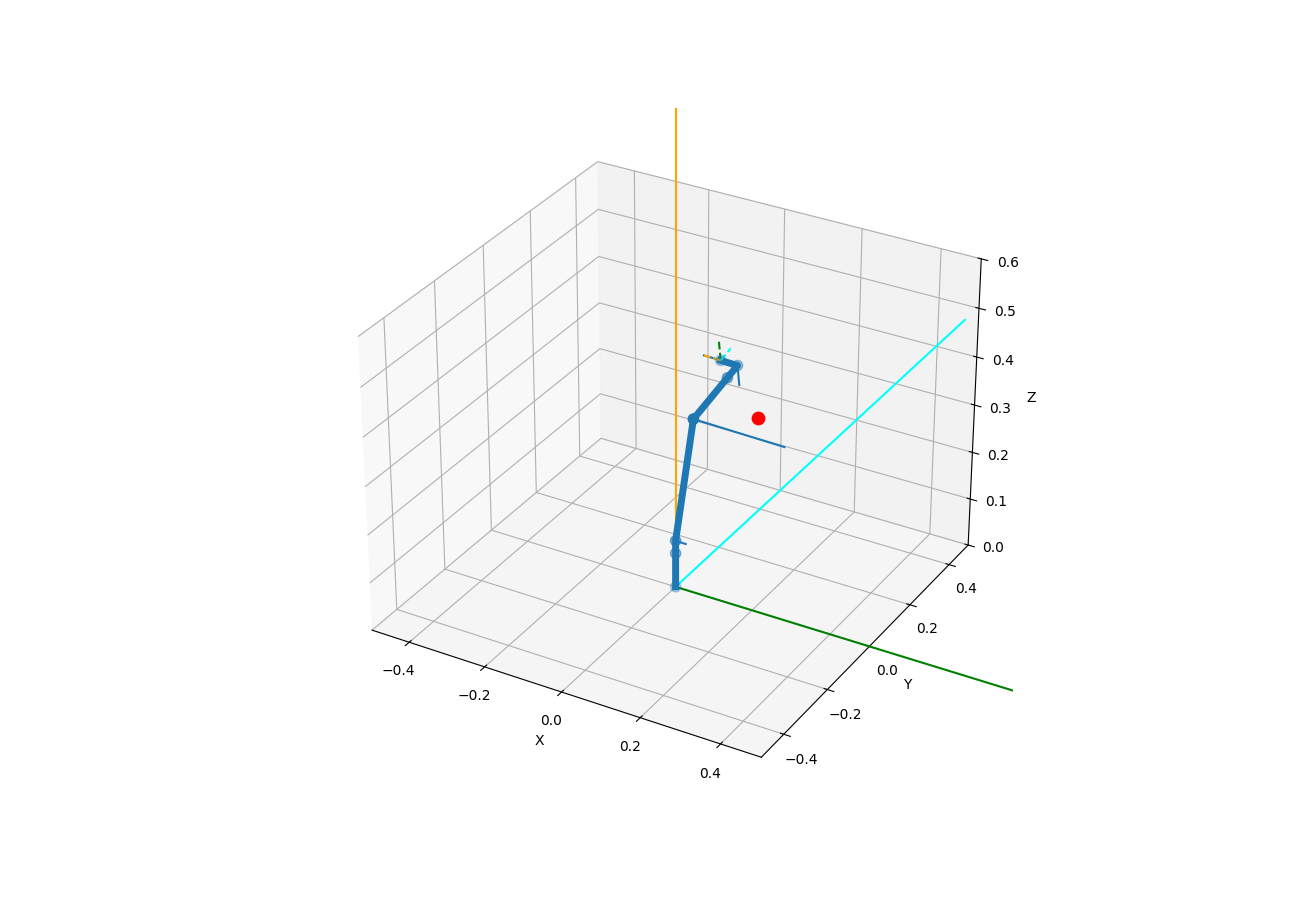

In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)  
fig.set_figwidth(13)  
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()

In [11]:
print(ik)

print(type(ik))
print()
print(ik[1].item())
print()

motor1 = "{:.2f}".format(math.degrees(ik[1].item()))
i_motor1 = int(float((motor1)))
i_motor1 = i_motor1 + 90
print("motor 1:", i_motor1)


motor2 = "{:.2f}".format(math.degrees(ik[2].item()))
i_motor2 = int(float((motor2)))
i_motor2 = i_motor2 + 90
print("motor 2:", i_motor2)

motor3 = "{:.2f}".format(math.degrees(ik[3].item()))
i_motor3 = int(float((motor3)))
i_motor3 = i_motor3 + 90
print("motor 3:", i_motor3)

motor4 = "{:.2f}".format(math.degrees(ik[4].item()))
i_motor4 = int(float((motor4)))
i_motor4 = i_motor4 + 90
print("motor 4:", i_motor4)

motor5 = "{:.2f}".format(math.degrees(ik[5].item()))
i_motor5 = int(float((motor5)))
i_motor5 = i_motor5 + 90
print("motor 5:", i_motor5)

motor6 = "{:.2f}".format(math.degrees(ik[6].item()))
i_motor6 = int(float((motor6)))
i_motor6 = i_motor6 + 90
print("motor 6:", i_motor6)

[ 0.          0.03490017 -0.32355753 -1.04719999  1.5660479  -1.5708
  0.        ]
<class 'numpy.ndarray'>

0.034900166658212925

motor 1: 92
motor 2: 72
motor 3: 30
motor 4: 179
motor 5: 0
motor 6: 90


In [ ]:
kit=ServoKit(channels=16)
servo=3

se importa la liberia para servos usando comunicacion i2c

In [ ]:
# SPDX-FileCopyrightText: 2018 Kattni Rembor for Adafruit Industries
#
# SPDX-License-Identifier: MIT

"""
`adafruit_servokit`
====================================================

CircuitPython helper library for the PWM/Servo FeatherWing, Shield and Pi HAT and Bonnet kits.

* Author(s): Kattni Rembor

Implementation Notes
--------------------

**Hardware:**

* `8-Channel PWM or Servo FeatherWing <https://www.adafruit.com/product/2928>`_
* `Adafruit 16-Channel 12-bit PWM/Servo Shield <https://www.adafruit.com/product/1411>`_
* `Adafruit 16-Channel PWM/Servo HAT for Raspberry Pi <https://www.adafruit.com/product/2327>`_
* `Adafruit 16-Channel PWM/Servo Bonnet for Raspberry Pi <https://www.adafruit.com/product/3416>`_

**Software and Dependencies:**

* Adafruit CircuitPython firmware for the supported boards:
  https://github.com/adafruit/circuitpython/releases

* Adafruit's Bus Device library: https://github.com/adafruit/Adafruit_CircuitPython_BusDevice
* Adafruit's Register library: https://github.com/adafruit/Adafruit_CircuitPython_Register
* Adafruit's PCA9685 library: https://github.com/adafruit/Adafruit_CircuitPython_PCA9685
* Adafruit's Motor library: https://github.com/adafruit/Adafruit_CircuitPython_Motor

"""

import board
from adafruit_pca9685 import PCA9685

try:
    from typing import Optional
    from busio import I2C
    from adafruit_motor.servo import Servo, ContinuousServo
except ImportError:
    pass

__version__ = "0.0.0+auto.0"
__repo__ = "https://github.com/adafruit/Adafruit_CircuitPython_ServoKit.git"


class ServoKit:
    """Class representing an Adafruit PWM/Servo FeatherWing, Shield or Pi HAT and Bonnet kits.

    Automatically uses the I2C bus on a Feather, Metro or Raspberry Pi.

    Initialise the PCA9685 chip at ``address``.

    The internal reference clock is 25MHz but may vary slightly with environmental conditions and
    manufacturing variances. Providing a more precise ``reference_clock_speed`` can improve the
    accuracy of the frequency and duty_cycle computations. See the ``calibration.py`` example in
    the `PCA9685 GitHub repo <https://github.com/adafruit/Adafruit_CircuitPython_PCA9685>`_ for
    how to derive this value by measuring the resulting pulse widths.

    :param int channels: The number of servo channels available. Must be 8 or 16. The FeatherWing
                         has 8 channels. The Shield, HAT, and Bonnet have 16 channels.
    :param ~I2C i2c: The I2C bus to use. If not provided, the default I2C ``board.I2C()`` will
                         be used.
    :param int address: The I2C address of the PCA9685. Default address is ``0x40``.
    :param int reference_clock_speed: The frequency of the internal reference clock in Hertz.
                                      Default reference clock speed is ``25000000``.
    :param int frequency: The overall PWM frequency of the PCA9685 in Hertz.
                                      Default frequency is ``50``.

    """

    def __init__(
        self,
        *,
        channels: int,
        i2c: Optional[I2C] = None,
        address: int = 0x40,
        reference_clock_speed: int = 25000000,
        frequency: int = 50
    ) -> None:
        if channels not in [8, 16]:
            raise ValueError("servo_channels must be 8 or 16!")
        self._items = [None] * channels
        self._channels = channels
        if i2c is None:
            i2c = board.I2C()
        self._pca = PCA9685(
            i2c, address=address, reference_clock_speed=reference_clock_speed
        )
        self._pca.frequency = frequency

        self._servo = _Servo(self)
        self._continuous_servo = _ContinuousServo(self)

    @property
    def servo(self) -> "_Servo":
        """:class:`~adafruit_motor.servo.Servo` controls for standard servos.

        This FeatherWing example rotates a servo on channel ``0`` to ``180`` degrees for one second,
        and then returns it to ``0`` degrees.

        .. code-block:: python

            import time
            from adafruit_servokit import ServoKit

            kit = ServoKit(channels=8)

            kit.servo[0].angle = 180
            time.sleep(1)
            kit.servo[0].angle = 0

        """
        return self._servo

    @property
    def continuous_servo(self) -> "_ContinuousServo":
        """:class:`~adafruit_motor.servo.ContinuousServo` controls for continuous rotation
        servos.

        This FeatherWing example rotates a continuous rotation servo on channel ``0`` forward for
        one second, then backward for one second, and then stops the rotation.

        .. code-block:: python

            import time
            from adafruit_servokit import ServoKit

            kit = ServoKit(channels=8)

            kit.continuous_servo[0].throttle = 1
            time.sleep(1)
            kit.continuous_servo[0].throttle = -1
            time.sleep(1)
            kit.continuous_servo[0].throttle = 0

        """
        return self._continuous_servo


class _Servo:
    # pylint: disable=protected-access
    def __init__(self, kit: ServoKit) -> None:
        self.kit = kit

    def __getitem__(self, servo_channel: int) -> Servo:
        import adafruit_motor.servo  # pylint: disable=import-outside-toplevel

        num_channels = self.kit._channels
        if servo_channel >= num_channels or servo_channel < 0:
            raise ValueError("servo must be 0-{}!".format(num_channels - 1))
        servo = self.kit._items[servo_channel]
        if servo is None:
            servo = adafruit_motor.servo.Servo(self.kit._pca.channels[servo_channel])
            self.kit._items[servo_channel] = servo
            return servo
        if isinstance(self.kit._items[servo_channel], adafruit_motor.servo.Servo):
            return servo
        raise ValueError("Channel {} is already in use.".format(servo_channel))

    def __len__(self) -> int:
        return len(self.kit._items)


class _ContinuousServo:
    # pylint: disable=protected-access
    def __init__(self, kit: ServoKit) -> None:
        self.kit = kit

    def __getitem__(self, servo_channel: int) -> ContinuousServo:
        import adafruit_motor.servo  # pylint: disable=import-outside-toplevel

        num_channels = self.kit._channels
        if servo_channel >= num_channels or servo_channel < 0:
            raise ValueError("servo must be 0-{}!".format(num_channels - 1))
        servo = self.kit._items[servo_channel]
        if servo is None:
            servo = adafruit_motor.servo.ContinuousServo(
                self.kit._pca.channels[servo_channel]
            )
            self.kit._items[servo_channel] = servo
            return servo
        if isinstance(
            self.kit._items[servo_channel], adafruit_motor.servo.ContinuousServo
        ):
            return servo
        raise ValueError("Channel {} is already in use.".format(servo_channel))

    def __len__(self) -> int:
        return len(self.kit._items)

In [14]:
while True:
    if 0 <= i_motor1 <= 180:
        ##kit.servo[0].angle=i_motor1
        ##time.sleep(1)
        print(i_motor1)
        
    else:
        print("El valor ingresado no está dentro del rango permitido")
        

    if 0 <= i_motor2 <= 180:
        ##kit.servo[0].angle=i_motor2
        ##time.sleep(1)
        print(i_motor2)
        
    else:
        print("El valor ingresado no está dentro del rango permitido")
        

    if 0 <= i_motor3 <= 180:
        ##kit.servo[0].angle=i_motor3
        ##time.sleep(1)
        print(i_motor3)
        break
    else:
        print("El valor ingresado no está dentro del rango permitido")
        break


    

92
72
30
